In [2]:
import pandas as pd
import numpy as np          # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
# import seaborn as sns
%matplotlib inline

train_csv_file_path = "D:\\ACA semester 7\\CS4622 - Machine Learning\\ML-Project\Data\\train.csv"
valid_csv_file_path = "D:\\ACA semester 7\\CS4622 - Machine Learning\\ML-Project\Data\\valid.csv"
test_csv_file_path = "D:\\ACA semester 7\\CS4622 - Machine Learning\\ML-Project\Data\\test.csv"

# Train dataset

In [3]:
train_df = pd.read_csv(train_csv_file_path)
train_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,0.186257,-0.058807,0.024632,-0.163933,-0.146699,0.035889,0.111708,-0.162861,0.028249,-0.098063,...,0.055629,-0.010358,0.125754,0.011648,0.079197,0.093215,45,NaN,1,6
1,0.063431,-0.023597,0.068057,-0.252915,-0.061094,-0.027316,0.135747,-0.168147,0.091236,-0.078473,...,-0.014893,0.071721,0.018918,0.100032,-0.083042,0.088615,45,NaN,1,6
2,0.034962,0.035816,-0.029753,-0.094607,-0.017576,-0.053074,0.040121,-0.007932,0.097872,-0.024042,...,0.012415,0.015215,0.083808,0.031312,-0.056277,0.064702,45,NaN,1,6
3,0.033772,0.085612,0.067488,-0.073953,-0.180646,-0.024512,0.242879,-0.023374,-0.059999,0.002006,...,-0.078246,-0.032903,0.082949,-0.020659,0.082274,-0.050164,45,NaN,1,6
4,0.134305,0.062096,0.106920,-0.089327,0.117093,-0.077107,0.152579,0.047529,-0.015998,-0.110657,...,-0.094629,0.069718,0.014379,0.048124,0.007586,-0.016980,45,NaN,1,6


In [4]:
# get type of each column
train_df.dtypes

feature_1      float64
feature_2      float64
feature_3      float64
feature_4      float64
feature_5      float64
                ...   
feature_768    float64
label_1          int64
label_2        float64
label_3          int64
label_4          int64
Length: 772, dtype: object

## Renaming Labels

*   Since the labels are in 'label_1', 'label_2' ... format, I will be renaming them to 'speaker_ID', 'speaker_age', ... format


In [5]:
train_df.rename(columns={'label_1': 'speaker_ID', 'label_2': 'speaker_age', 'label_3': 'speaker_gender', 'label_4': 'speaker_accent'}, inplace=True)

In [6]:
train_df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,speaker_ID,speaker_age,speaker_gender,speaker_accent
count,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,...,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28520.000000,28040.000000,28520.000000,28520.000000
mean,0.065874,0.028860,0.017909,-0.063664,-0.152100,-0.047104,0.103360,-0.019966,0.053955,-0.066990,...,-0.027808,-0.036166,0.020930,0.033553,0.021910,0.002223,30.498843,27.975107,0.799299,5.997125
std,0.077031,0.052005,0.066953,0.063553,0.076321,0.060004,0.080915,0.064415,0.055282,0.055525,...,0.062439,0.059810,0.055272,0.061426,0.057703,0.077277,17.328389,5.735913,0.400532,2.375567
min,-0.208012,-0.255053,-0.266606,-0.343267,-0.513899,-0.310102,-0.219100,-0.328737,-0.144846,-0.296431,...,-0.277574,-0.292493,-0.246473,-0.225174,-0.202081,-0.322757,1.000000,22.000000,0.000000,0.000000
25%,0.017124,-0.006248,-0.030998,-0.103098,-0.202183,-0.085325,0.041097,-0.062285,0.016961,-0.102529,...,-0.068011,-0.077156,-0.015498,-0.008668,-0.019020,-0.043847,15.000000,25.000000,1.000000,6.000000
50%,0.067048,0.031829,0.014992,-0.063066,-0.150201,-0.043714,0.102243,-0.019105,0.058116,-0.062655,...,-0.026689,-0.033144,0.024588,0.029152,0.016737,0.012354,30.000000,27.000000,1.000000,6.000000
75%,0.117308,0.063893,0.063480,-0.022328,-0.101837,-0.004591,0.162044,0.022008,0.092691,-0.028027,...,0.011446,0.007627,0.059094,0.073403,0.058569,0.057865,46.000000,30.000000,1.000000,6.000000
max,0.335540,0.235086,0.304683,0.242093,0.167758,0.206523,0.402070,0.270795,0.276515,0.255341,...,0.224582,0.199627,0.254224,0.312076,0.260679,0.279346,60.000000,61.000000,1.000000,13.000000


## Check for null/NaN values in all columns



In [7]:
train_df.isna().any()

# Based on below output we can see that there are missing values in the speaker_age column of the dataset.
# Let's now check whether that is the only column with missing values.

feature_1         False
feature_2         False
feature_3         False
feature_4         False
feature_5         False
                  ...  
feature_768       False
speaker_ID        False
speaker_age        True
speaker_gender    False
speaker_accent    False
Length: 772, dtype: bool

In [8]:
train_df.isnull().sum()

feature_1           0
feature_2           0
feature_3           0
feature_4           0
feature_5           0
                 ... 
feature_768         0
speaker_ID          0
speaker_age       480
speaker_gender      0
speaker_accent      0
Length: 772, dtype: int64

In [9]:
train_df.isnull().sum().sum()

# Based on the above and below outputs, we can see that there are 480 missing values 'only' in the speaker_age column. No missing values in other columns.

480

In [10]:
print("train dataset shape:", train_df.shape)
print("null values row count: ", train_df.isnull().sum().sum())
print("null values row count percentage: ", (train_df.isnull().sum().sum() / train_df.shape[0]) * 100)

train dataset shape: (28520, 772)
null values row count:  480
null values row count percentage:  1.6830294530154277


In [11]:
# Let's now check the distribution of the speaker_age column.
train_df.speaker_age.value_counts()

26.0    4762
25.0    2849
27.0    2846
23.0    2842
31.0    2385
24.0    1906
28.0    1899
30.0    1894
22.0    1432
29.0    1424
33.0     945
36.0     481
35.0     480
34.0     478
32.0     476
41.0     474
61.0     467
Name: speaker_age, dtype: int64

## Handling Null values (Replace with Mean)

In [12]:
# Let's get the mean of the speaker_age column.
speaker_age_mean = train_df.speaker_age.mean()
print("mean: ", speaker_age_mean)

# round it to nearest int
speaker_age_mean = round(speaker_age_mean)

mean:  27.975106990014265


In [13]:
# Let's now fill the missing values with the mean value.
train_df.speaker_age.fillna(speaker_age_mean, inplace=True)

## Checking each Label distribution

### Speaker age

In [14]:
# Let's now check the distribution of the speaker_age column.
train_df.speaker_age.value_counts()

26.0    4762
25.0    2849
27.0    2846
23.0    2842
31.0    2385
28.0    2379
24.0    1906
30.0    1894
22.0    1432
29.0    1424
33.0     945
36.0     481
35.0     480
34.0     478
32.0     476
41.0     474
61.0     467
Name: speaker_age, dtype: int64

In [15]:
# Number os unique values in speaker age column
train_df.speaker_age.nunique()

17

<Axes: >

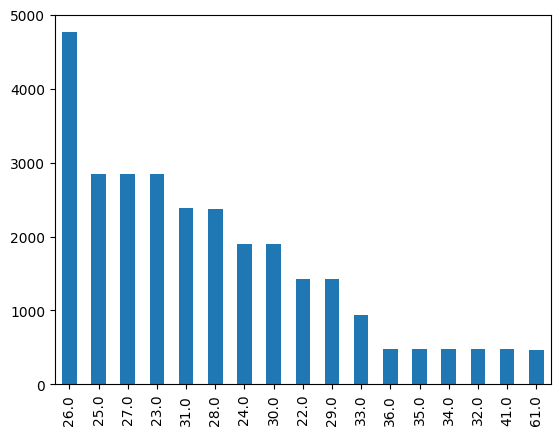

In [16]:
train_df.speaker_age.value_counts().plot.bar()

In [17]:
# There is a slight class imbalance issue based on above outputs. As a solution we can use RandomForrestClassifier with class_weight='balanced' parameter.

# Note; hpt: forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

# use averaged F1 score 

### Speaker ID

In [18]:
# Let's now check the distribution of the speaker_ID column.
train_df.speaker_ID.value_counts()

12    485
35    484
26    483
60    482
24    482
25    481
59    481
10    481
54    481
45    480
41    480
9     480
2     479
42    479
47    479
6     479
56    479
34    478
52    478
3     478
14    478
33    478
43    477
1     477
13    477
20    477
23    477
30    476
51    476
32    476
53    476
22    476
38    476
49    476
55    475
28    474
8     474
40    474
48    474
21    474
4     474
39    473
17    473
7     473
15    472
58    472
5     471
27    471
31    470
19    469
11    469
46    469
29    469
36    468
16    468
50    467
37    467
44    467
57    466
18    465
Name: speaker_ID, dtype: int64

In [19]:
# Let's get num of unique values in speaker_ID column.
train_df.speaker_ID.nunique()

60

<Axes: >

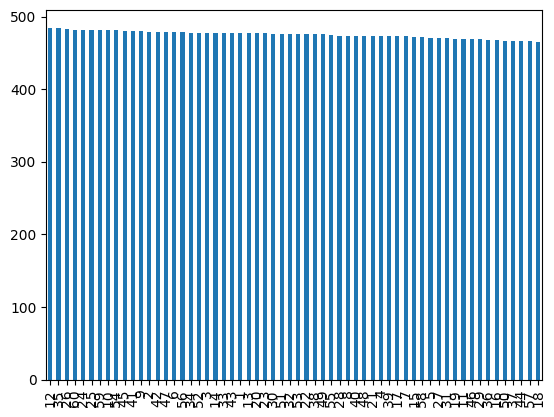

In [20]:
train_df.speaker_ID.value_counts().plot.bar()

# There is no significant class imbalance issue based on above outputs for the Speaker_ID column

### Speaker gender

In [21]:
# Let's now check the distribution of the speaker_age column.
train_df.speaker_gender.value_counts()

1    22796
0     5724
Name: speaker_gender, dtype: int64

In [22]:
train_df.speaker_gender.nunique()

2

<Axes: >

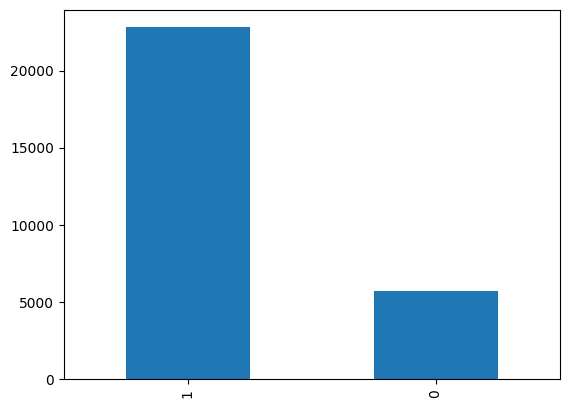

In [23]:
train_df.speaker_gender.value_counts().plot.bar()

# There is a significant class imbalance issue in speaker_gender column. As a solution we can use RandomForrestClassifier with class_weight='balanced' parameter.
# Also when splitting the dataset, I will use the stratisfied sampling technique.

# Note; hpt: forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

# NOte; print classification report | use averaged/macro F1

# # Define the steps in your pipeline
# steps = [
#     ('scaler', StandardScaler()),  # Standardize the features
#     ('oversampler', SMOTE(random_state=42)),  # Apply SMOTE for oversampling
#     ('pca', PCA(n_components=0.95)),  # Apply PCA for dimensionality reduction
#     ('xgb', XGBClassifier(scale_pos_weight=np.sqrt(np.sum(y == 0) / np.sum(y == 1))))  # XGBoost Classifier
# ]

# The parameter scale_pos_weight is used in XGBoost to address class imbalance. It's an important hyperparameter to consider when working with imbalanced datasets. The specific value provided (np.sqrt(np.sum(y == 0) / np.sum(y == 1))) is a common heuristic used for setting scale_pos_weight, but it should be chosen based on the characteristics of your dataset.

### Speaker accent

In [24]:
# Let's now check the distribution of the speaker_age column.
train_df.speaker_accent.value_counts()

6     19938
2      1449
0       955
12      954
7       938
13      482
1       481
11      480
10      480
3       479
5       478
9       472
4       469
8       465
Name: speaker_accent, dtype: int64

In [25]:
train_df.speaker_accent.nunique()

14

<Axes: >

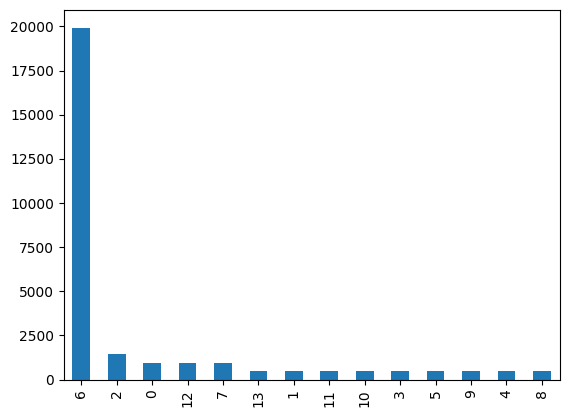

In [26]:
train_df.speaker_accent.value_counts().plot.bar()   

# There is a significant class imbalance issue in speaker_accents column. As a solution we can use RandomForrestClassifier with class_weight='balanced' parameter.
# Also when splitting the dataset, I will use the stratisfied sampling technique.

# Note; hpt: forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

# use avraged F1/macro F1

# <!-- # Make predictions on the test set -->
# y_pred = classifier_pipeline.predict(X_test)

# <!-- # Generate a classification report -->
# report = classification_report(y_test, y_pred)

# <!-- # Print the classification report -->
# print("Classification Report:\n", report)

# Validation dataset

In [27]:
valid_df = pd.read_csv(valid_csv_file_path)
valid_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_1,label_2,label_3,label_4
0,0.085129,0.000378,-0.029872,-0.104609,-0.191291,-0.025511,0.029381,0.006177,0.079207,-0.012729,...,-0.026701,0.003306,0.052219,0.000784,0.004527,0.102033,45,NaN,1,6
1,0.222652,-0.094210,-0.056387,-0.210214,-0.294624,-0.032355,-0.069078,-0.172146,0.056509,-0.126757,...,-0.041096,0.013654,0.142623,-0.011882,0.005219,0.143616,45,NaN,1,6
2,0.072147,0.023575,-0.017664,-0.070988,-0.098729,0.018534,0.028282,-0.064789,0.094686,-0.067313,...,-0.064602,-0.018653,0.013636,-0.078994,0.060903,0.064752,45,NaN,1,6
3,0.026623,0.052005,-0.006921,-0.075105,-0.074829,-0.031380,0.012402,-0.043555,0.073825,-0.050979,...,-0.005655,0.015477,0.064209,0.025045,-0.049599,0.078412,45,NaN,1,6
4,0.112069,0.113702,0.044343,0.010162,-0.169193,-0.099847,0.195957,0.051861,0.024582,0.001314,...,-0.118097,-0.043349,0.036754,-0.023065,0.007358,-0.132566,45,NaN,1,6


In [28]:
# get type of each column
valid_df.dtypes

feature_1      float64
feature_2      float64
feature_3      float64
feature_4      float64
feature_5      float64
                ...   
feature_768    float64
label_1          int64
label_2        float64
label_3          int64
label_4          int64
Length: 772, dtype: object

## Renaming Labels

*   Since the labels are in 'label_1', 'label_2' ... format, I will be renaming them to 'speaker_ID', 'speaker_age', ... format


In [29]:
valid_df.rename(columns={'label_1': 'speaker_ID', 'label_2': 'speaker_age', 'label_3': 'speaker_gender', 'label_4': 'speaker_accent'}, inplace=True)

In [30]:
valid_df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,speaker_ID,speaker_age,speaker_gender,speaker_accent
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,736.000000,750.000000,750.000000
mean,0.065343,0.028254,0.017104,-0.064875,-0.150976,-0.045967,0.103203,-0.024541,0.056699,-0.068377,...,-0.029009,-0.035013,0.022654,0.031738,0.021984,0.007387,30.085333,28.330163,0.810667,6.117333
std,0.075503,0.051639,0.070737,0.065121,0.076390,0.060949,0.079239,0.065462,0.053570,0.055164,...,0.061546,0.060042,0.054347,0.063622,0.055285,0.078428,17.489060,6.518500,0.392035,2.227895
min,-0.154389,-0.127209,-0.206854,-0.268425,-0.418381,-0.252394,-0.096562,-0.213260,-0.105972,-0.256963,...,-0.234465,-0.219546,-0.162846,-0.168805,-0.128853,-0.256403,1.000000,22.000000,0.000000,0.000000
25%,0.018203,-0.006113,-0.032940,-0.102911,-0.197965,-0.086631,0.040759,-0.067297,0.023229,-0.105432,...,-0.068467,-0.074493,-0.012096,-0.010266,-0.015070,-0.041183,15.000000,25.000000,1.000000,6.000000
50%,0.064435,0.032623,0.015322,-0.063273,-0.149014,-0.042593,0.102535,-0.025283,0.062613,-0.064284,...,-0.025893,-0.030194,0.025138,0.025431,0.016813,0.013506,29.000000,27.000000,1.000000,6.000000
75%,0.112311,0.064124,0.063005,-0.026061,-0.101120,-0.000968,0.163022,0.017450,0.096418,-0.029683,...,0.009571,0.008086,0.061446,0.071360,0.055578,0.063816,45.000000,30.000000,1.000000,6.000000
max,0.308737,0.169459,0.220998,0.133039,0.081396,0.104645,0.328981,0.157345,0.203738,0.111428,...,0.198216,0.108848,0.174819,0.270681,0.229520,0.231531,60.000000,61.000000,1.000000,13.000000


## Check for null/NaN values in all columns



In [31]:
valid_df.isna().any()

# Based on below output we can see that there are missing values in the speaker_age column of the dataset.
# Let's now check whether that is the only column with missing values.

feature_1         False
feature_2         False
feature_3         False
feature_4         False
feature_5         False
                  ...  
feature_768       False
speaker_ID        False
speaker_age        True
speaker_gender    False
speaker_accent    False
Length: 772, dtype: bool

In [32]:
valid_df.isnull().sum()

feature_1          0
feature_2          0
feature_3          0
feature_4          0
feature_5          0
                  ..
feature_768        0
speaker_ID         0
speaker_age       14
speaker_gender     0
speaker_accent     0
Length: 772, dtype: int64

In [33]:
valid_df.isnull().sum().sum()

# Based on the above and below outputs, we can see that there are 480 missing values 'only' in the speaker_age column. No missing values in other columns.

14

In [34]:
print("validation dataset shape:", valid_df.shape)
print("null values row count: ", valid_df.isnull().sum().sum())
print("null values row count percentage: ", (valid_df.isnull().sum().sum() / valid_df.shape[0]) * 100)

validation dataset shape: (750, 772)
null values row count:  14
null values row count percentage:  1.866666666666667


In [35]:
# Let's now check the distribution of the speaker_age column.
valid_df.speaker_age.value_counts()

26.0    115
27.0     81
25.0     79
23.0     71
31.0     65
30.0     48
28.0     46
24.0     46
29.0     45
22.0     36
33.0     30
61.0     19
41.0     14
34.0     11
32.0     11
35.0     11
36.0      8
Name: speaker_age, dtype: int64

## Handling Null values (Replace with Mean)

In [36]:
# Let's get the mean of the speaker_age column.
speaker_age_mean = valid_df.speaker_age.mean()

# round it to nearest int
speaker_age_mean = round(speaker_age_mean)
print("mean: ", speaker_age_mean)

mean:  28


In [37]:
# Let's now fill the missing values with the mean value.
valid_df.speaker_age.fillna(speaker_age_mean, inplace=True)

In [38]:
valid_df.speaker_age.value_counts()

26.0    115
27.0     81
25.0     79
23.0     71
31.0     65
28.0     60
30.0     48
24.0     46
29.0     45
22.0     36
33.0     30
61.0     19
41.0     14
34.0     11
32.0     11
35.0     11
36.0      8
Name: speaker_age, dtype: int64

In [39]:
# Preparing training and validation datasets
from sklearn.model_selection import train_test_split

train_X = train_df.drop(['speaker_ID', 'speaker_age', 'speaker_gender', 'speaker_accent'], axis=1)
train_speaker_IDs = train_df['speaker_ID']
train_speaker_ages = train_df['speaker_age']
train_speaker_genders = train_df['speaker_gender']
train_speaker_accents = train_df['speaker_accent']

valid_X = valid_df.drop(['speaker_ID', 'speaker_age', 'speaker_gender', 'speaker_accent'], axis=1)
valid_speaker_IDs = valid_df['speaker_ID']
valid_speaker_ages = valid_df['speaker_age']
valid_speaker_genders = valid_df['speaker_gender']
valid_speaker_accents = valid_df['speaker_accent']


# Test dataset

In [40]:
test_df = pd.read_csv(test_csv_file_path)
test_df.head()

,ID,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
0,1,0.187868,-0.009268,0.039846,-0.102515,-0.109121,-0.079769,0.061295,-0.042890,0.099860,...,0.043647,0.061174,0.026771,-0.092734,-0.052383,-0.055526,0.029101,0.041857,-0.027872,0.099500
1,2,0.122119,0.019015,0.134483,0.007949,-0.157884,-0.033332,0.044334,-0.016869,-0.014088,...,-0.179798,-0.027611,0.240023,-0.005648,-0.057537,0.023922,-0.038126,-0.015171,-0.006270,-0.003790
2,3,0.079187,0.146195,-0.001316,-0.085596,-0.261093,-0.021620,0.268898,-0.103950,0.068976,...,-0.075460,0.037346,0.124254,-0.369695,-0.056773,-0.028471,0.019971,-0.065683,-0.047366,-0.121744
3,4,0.231196,0.021558,0.215534,-0.210258,-0.158189,0.041621,0.240254,-0.068112,-0.017550,...,0.083334,0.141642,-0.007219,0.031547,-0.010762,-0.169036,-0.030963,0.086698,0.114194,-0.036775
4,5,0.020412,0.063732,-0.065506,-0.089598,-0.130788,-0.018809,0.119304,-0.057494,0.094714,...,-0.001969,-0.003025,-0.021156,-0.136993,-0.003615,0.036371,0.048715,-0.002688,-0.016957,-0.004331


In [41]:
# get type of each column
test_df.dtypes

ID               int64
feature_1      float64
feature_2      float64
feature_3      float64
feature_4      float64
                ...   
feature_764    float64
feature_765    float64
feature_766    float64
feature_767    float64
feature_768    float64
Length: 769, dtype: object

In [42]:
test_df.isna().any()

ID             False
feature_1      False
feature_2      False
feature_3      False
feature_4      False
               ...  
feature_764    False
feature_765    False
feature_766    False
feature_767    False
feature_768    False
Length: 769, dtype: bool

In [43]:
test_df.isnull().sum().sum()

# based on above output we can see that there are no missing values in the test dataset

0

In [44]:
test_X = test_df.drop(["ID"], axis=1)
print("test dataset shape:", test_X.shape)
test_X.head()

test dataset shape: (744, 768)


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
0,0.187868,-0.009268,0.039846,-0.102515,-0.109121,-0.079769,0.061295,-0.042890,0.099860,-0.066319,...,0.043647,0.061174,0.026771,-0.092734,-0.052383,-0.055526,0.029101,0.041857,-0.027872,0.099500
1,0.122119,0.019015,0.134483,0.007949,-0.157884,-0.033332,0.044334,-0.016869,-0.014088,-0.060542,...,-0.179798,-0.027611,0.240023,-0.005648,-0.057537,0.023922,-0.038126,-0.015171,-0.006270,-0.003790
2,0.079187,0.146195,-0.001316,-0.085596,-0.261093,-0.021620,0.268898,-0.103950,0.068976,-0.062388,...,-0.075460,0.037346,0.124254,-0.369695,-0.056773,-0.028471,0.019971,-0.065683,-0.047366,-0.121744
3,0.231196,0.021558,0.215534,-0.210258,-0.158189,0.041621,0.240254,-0.068112,-0.017550,-0.233767,...,0.083334,0.141642,-0.007219,0.031547,-0.010762,-0.169036,-0.030963,0.086698,0.114194,-0.036775
4,0.020412,0.063732,-0.065506,-0.089598,-0.130788,-0.018809,0.119304,-0.057494,0.094714,-0.047923,...,-0.001969,-0.003025,-0.021156,-0.136993,-0.003615,0.036371,0.048715,-0.002688,-0.016957,-0.004331


# Developing the Pipelines

In [45]:
# Let's now develop pipelines to predict the speaker ID, speaker age, speaker gender, and speaker accent. 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.svm import LinearSVC
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import GridSearchCV

## For Speaker_IDs

In [50]:
#  StandardScaler => For ensuring that all features have the same scale, which is often crucial for the proper functioning of many machine learning algorithms.
#  PCA => For dimensionality reduction
#  SVC => Support Vector Classifier

# Pipeline for speaker ID prediction without feature engineering (to check raw accuracy)
speaker_ID_pipe_svc = Pipeline([ 
    ('clf', SVC())
    ])


# Pipleline for speaker ID prediction with PCA for feature reduction
speaker_ID_pipe_scaler_pca_svc = Pipeline([
    # ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('clf', SVC())
    ])

# Pipleline for speaker ID prediction with Model-based feature reduction
speaker_ID_pipe_scaler_sfmlr_svc = Pipeline([
    # ('scaler', StandardScaler()),
    ('SFM_LR', SelectFromModel(LogisticRegression(C=0.01, penalty='l1', solver='liblinear', class_weight='balanced'))),
    ('clf', SVC())  
])

In [47]:
temp = Pipeline([
        ('pca', PCA(n_components=0.95)),
        ('clf', SVC())
    ])

In [48]:
temp.fit(train_X, train_speaker_IDs)


Pipeline(steps=[('pca', PCA(n_components=0.95)), ('clf', SVC())])

In [49]:
temp.score(valid_X, valid_speaker_IDs)

0.972

In [51]:
##visualize Pipeline
from sklearn import set_config
set_config(display='diagram')

In [52]:
train_X.shape, train_speaker_IDs.shape, train_speaker_genders.shape, train_speaker_accents.shape

((28520, 768), (28520,), (28520,), (28520,))

### Training

In [53]:
# Pipeine without feature engineering
speaker_ID_pipe_svc.fit(train_X, train_speaker_IDs)

Pipeline(steps=[('clf', SVC())])

In [54]:
# Pipeine with PCA for feature reduction
speaker_ID_pipe_scaler_pca_svc.fit(train_X, train_speaker_IDs)

Pipeline(steps=[('pca', PCA(n_components=0.95)), ('clf', SVC())])

In [55]:
# Pipeine with Model-based feature reduction (SelectFromModel - LogisticRegression)
speaker_ID_pipe_scaler_sfmlr_svc.fit(train_X, train_speaker_IDs)

Pipeline(steps=[('SFM_LR',
                 SelectFromModel(estimator=LogisticRegression(C=0.01,
                                                              class_weight='balanced',
                                                              penalty='l1',
                                                              solver='liblinear'))),
                ('clf', SVC())])

In [56]:
# Let's now check the accuracies.
print("Without feature engineering: ", speaker_ID_pipe_svc.score(valid_X, valid_speaker_IDs)*100, "%")
print("With PCA for feature reduction: ", speaker_ID_pipe_scaler_pca_svc.score(valid_X, valid_speaker_IDs)*100, "%")
print("With Model-based feature reduction: ", speaker_ID_pipe_scaler_sfmlr_svc.score(valid_X, valid_speaker_IDs)*100, "%")

Without feature engineering:  95.6 %
With PCA for feature reduction:  97.2 %
With Model-based feature reduction:  62.93333333333333 %


In [58]:
num_features_before_reduction = speaker_ID_pipe_svc.named_steps['clf'].n_features_in_
num_features_after_pca = speaker_ID_pipe_scaler_pca_svc.named_steps['pca'].n_components_
num_features_after_sfmlr = sum(speaker_ID_pipe_scaler_sfmlr_svc.named_steps['SFM_LR'].get_support())

print("Number of features before reduction: ", num_features_before_reduction)
print("Number of features after PCA: ", num_features_after_pca)
print("Number of features after model-based feature reduction: ", num_features_after_sfmlr)

# Based on the above output accuracies and the reduced num of features, we can see that the model with model-based feature reduction has the highest accuracy (96%). Also it reduced the num of features to 693 from 768
# Also, the PCA model reduced the accuracy slightly (by ~0.2%), but it has reduced the um of features to 321 from 768

Number of features before reduction:  768
Number of features after PCA:  239
Number of features after model-based feature reduction:  18


### Hyperparameter tuning

In [44]:
# Let's now try to improve the accuracy of the model with PCA for feature reduction by tuning the hyperparameters of the model.

param_grid = dict(PCA__n_components=[0.95, 0.96, 0.97],
                  clf__C=np.logspace(-2, 1, 4),
                  clf__kernel=['rbf','linear',  'poly'])

grid = GridSearchCV(speaker_ID_pipe_scaler_pca_svc, param_grid=param_grid, cv=3, n_jobs=1, verbose=2, scoring= 'accuracy')

In [51]:
grid.fit(train_X, train_speaker_IDs)
print(grid.best_score_)
print(grid.cv_results_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END PCA__n_components=0.95, clf__C=0.01, clf__kernel=rbf; total time= 1.5min
[CV] END PCA__n_components=0.95, clf__C=0.01, clf__kernel=rbf; total time= 1.5min
[CV] END PCA__n_components=0.95, clf__C=0.01, clf__kernel=rbf; total time= 1.7min
[CV] END PCA__n_components=0.95, clf__C=0.01, clf__kernel=linear; total time=  36.9s
[CV] END PCA__n_components=0.95, clf__C=0.01, clf__kernel=linear; total time=  34.1s
[CV] END PCA__n_components=0.95, clf__C=0.01, clf__kernel=linear; total time=  36.1s
[CV] END PCA__n_components=0.95, clf__C=0.01, clf__kernel=poly; total time= 1.2min
[CV] END PCA__n_components=0.95, clf__C=0.01, clf__kernel=poly; total time= 1.2min
[CV] END PCA__n_components=0.95, clf__C=0.01, clf__kernel=poly; total time= 1.3min
[CV] END PCA__n_components=0.95, clf__C=0.1, clf__kernel=rbf; total time= 1.4min
[CV] END PCA__n_components=0.95, clf__C=0.1, clf__kernel=rbf; total time= 1.4min
[CV] END PCA__n_components

In [56]:
# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters: ", grid.best_params_)
print("Best Accuracy: {:f}%".format(grid.best_score_ * 100))

# Therefore the best hyperparameters based on gridSearchCV : 
# - 'PCA__n_components': 0.97, 
# - 'clf__C': 10.0, 
# - 'clf__kernel': 'rbf'

Best Hyperparameters:  {'PCA__n_components': 0.97, 'clf__C': 10.0, 'clf__kernel': 'rbf'}
Best Accuracy: 95.625869%


In [59]:
best_PCA__n_components = 0.97
best_clf__C = 10.0
best_clf__kernel = 'rbf'

# Pipleline with best params
best_speaker_ID_pipe_scaler_pca_svc = Pipeline([
    # ('scaler', StandardScaler()),
    ('pca', PCA(n_components=best_PCA__n_components)),
    ('clf', SVC(C=best_clf__C, kernel=best_clf__kernel))
    ])

best_speaker_ID_pipe_scaler_pca_svc.fit(train_X, train_speaker_IDs)
print("PCA for feature reduction (Hyperparameters tuned): ", best_speaker_ID_pipe_scaler_pca_svc.score(valid_X, valid_speaker_IDs)*100, "%")

# best_svm = grid.best_estimator_
# pred_valid_speaker_IDs = best_svm.predict(valid_X)  
# validation_accuracy = accuracy_score(valid_speaker_IDs, pred_valid_speaker_IDs)
# print("Validation Accuracy:", validation_accuracy)

PCA for feature reduction (Hyperparameters tuned):  98.93333333333332 %


In [46]:
# Let's now try to improve the accuracy of the model with model-based for feature reduction by tuning the hyperparameters of the model.
param_grid = dict(SFM_LR__estimator__C=np.logspace(-2, 1, 4),
                    clf__C=np.logspace(-2, 1, 4),
                    clf__kernel=['rbf'])

grid = GridSearchCV(speaker_ID_pipe_scaler_sfmlr_svc, param_grid=param_grid, cv=3, n_jobs=1, verbose=2, scoring= 'accuracy')

In [72]:
grid.fit(train_X, train_speaker_IDs)
print(grid.best_score_)
print(grid.cv_results_) 

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END SFM_LR__estimator__C=0.01, clf__C=0.01, clf__kernel=rbf; total time= 4.4min
[CV] END SFM_LR__estimator__C=0.01, clf__C=0.01, clf__kernel=rbf; total time= 4.5min
[CV] END SFM_LR__estimator__C=0.01, clf__C=0.01, clf__kernel=rbf; total time= 4.1min
[CV] END SFM_LR__estimator__C=0.01, clf__C=0.1, clf__kernel=rbf; total time= 4.1min
[CV] END SFM_LR__estimator__C=0.01, clf__C=0.1, clf__kernel=rbf; total time= 4.2min
[CV] END SFM_LR__estimator__C=0.01, clf__C=0.1, clf__kernel=rbf; total time= 4.0min
[CV] END SFM_LR__estimator__C=0.01, clf__C=1.0, clf__kernel=rbf; total time= 3.3min
[CV] END SFM_LR__estimator__C=0.01, clf__C=1.0, clf__kernel=rbf; total time= 3.3min
[CV] END SFM_LR__estimator__C=0.01, clf__C=1.0, clf__kernel=rbf; total time= 3.2min
[CV] END SFM_LR__estimator__C=0.01, clf__C=10.0, clf__kernel=rbf; total time= 3.2min
[CV] END SFM_LR__estimator__C=0.01, clf__C=10.0, clf__kernel=rbf; total time= 3.2min
[CV] END S

In [73]:
# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters: ", grid.best_params_)
print("Best Accuracy: {:f}%".format(grid.best_score_ * 100))

# Therefore the best hyperparameters based on gridSearchCV : 
# - 'SFM_LR__estimator__C': 0.01, 
# - 'clf__C': 10.0, 
# - 'clf__kernel': 'rbf'

Best Hyperparameters:  {'SFM_LR__estimator__C': 0.01, 'clf__C': 10.0, 'clf__kernel': 'rbf'}
Best Accuracy: 96.637447%


In [60]:
best_SFM_LR__estimator__C = 0.01
best_clf__C = 10.0
best_clf__kernel = 'rbf'

# Pipleline with best params
best_speaker_ID_pipe_scaler_sfmlr_svc = Pipeline([
    # ('scaler', StandardScaler()),
    ('SFM_LR', SelectFromModel(LogisticRegression(C=best_SFM_LR__estimator__C, penalty='l1', solver='liblinear', class_weight='balanced'))),
    ('clf', SVC(kernel=best_clf__kernel, C=best_clf__C))  
])

best_speaker_ID_pipe_scaler_sfmlr_svc.fit(train_X, train_speaker_IDs)
print("Model-based feature reduction (Hyperparameters tuned): ", best_speaker_ID_pipe_scaler_sfmlr_svc.score(valid_X, valid_speaker_IDs)*100, "%")


# best_svm = grid.best_estimator_
# pred_valid_speaker_IDs = best_svm.predict(valid_X)  
# validation_accuracy = accuracy_score(valid_speaker_IDs, pred_valid_speaker_IDs)
# print("Validation Accuracy:", validation_accuracy)

Model-based feature reduction (Hyperparameters tuned):  79.2 %


In [61]:
print("PCA for feature reduction (Hyperparameters tuned): ", best_speaker_ID_pipe_scaler_pca_svc.score(valid_X, valid_speaker_IDs))
print("Model-based feature reduction (Hyperparameters tuned): ", best_speaker_ID_pipe_scaler_sfmlr_svc.score(valid_X, valid_speaker_IDs))

PCA for feature reduction (Hyperparameters tuned):  0.9893333333333333
Model-based feature reduction (Hyperparameters tuned):  0.792


### Prediction on test data 

In [76]:
# Let's use best performing pipeline to make predictions for the test data
pred_test = best_speaker_ID_pipe_scaler_pca_svc.predict(test_X)
print(pred_test.shape)

(744,)


In [77]:
pred_test = pd.DataFrame(pred_test, columns=['label_1'])
pred_test.head()

,label_1
0,26
1,18
2,16
3,7
4,58


In [78]:
if "ID" not in pred_test.columns:
    pred_test.insert(0, "ID", test_df['ID'])
else:
    print(f"Column : ID already exists")

In [79]:
pred_test.head()

,ID,label_1
0,1,26
1,2,18
2,3,16
3,4,7
4,5,58


## For Speaker_age

In [80]:
# from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE  

In [71]:
#  Note: 
# There is a slight class imbalance issue in speaker_age values. As a solution we can use class_weight='balanced' parameter.

# Note; hpt: forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

# use averaged F1 score 

# Pipeline for speaker ID prediction without feature engineering (to check raw accuracy)

#Let's choose a good classifer

speaker_age_pipe_svc = Pipeline([ 
    ('clf', SVC(class_weight='balanced'))
    ])

speaker_age_pipe_dtc = Pipeline([ 
    ('clf', DecisionTreeClassifier(class_weight='balanced'))
    ])

classes = np.unique(train_speaker_ages)
cw = class_weight.compute_class_weight(class_weight='balanced', classes=classes, y=train_speaker_ages)
weights = dict(zip(classes,cw))
class_weighted_model = DecisionTreeClassifier(class_weight=weights)

speaker_age_pipe_dtc2 = Pipeline([ 
    ('clf', class_weighted_model)
    ])

speaker_age_pipe_rfc = Pipeline([ 
    ('clf', RandomForestClassifier(class_weight='balanced'))
    ])

In [72]:
##visualize Pipeline
from sklearn import set_config
set_config(display='diagram')

### Training

In [73]:
# Pipeine without feature engineering
speaker_age_pipe_svc.fit(train_X, train_speaker_ages)

Pipeline(steps=[('clf', SVC(class_weight='balanced'))])

In [109]:
# Pipeine with PCA for feature reduction
speaker_age_pipe_dtc.fit(train_X, train_speaker_ages)

Pipeline(steps=[('clf', DecisionTreeClassifier(class_weight='balanced'))])

In [110]:
# Pipeine with PCA for feature reduction
speaker_age_pipe_dtc2.fit(train_X, train_speaker_ages)

Pipeline(steps=[('clf',
                 DecisionTreeClassifier(class_weight={22.0: 1.171541242195202,
                                                      23.0: 0.5903050875522623,
                                                      24.0: 0.8801925807048948,
                                                      25.0: 0.5888547065017653,
                                                      26.0: 0.3522988363762137,
                                                      27.0: 0.5894754247447398,
                                                      28.0: 0.705190020522711,
                                                      29.0: 1.1781229345670852,
                                                      30.0: 0.8857693024411454,
                                                      31.0: 0.7034159575779998,
                                                      32.0: 3.5244686109738015,
                                                      33.0: 1.7752878929349518,
                                                      34.0: 3.5097218803839527,
                                                      35.0: 3.4950980392156863,
                                                      36.0: 3.487831723125841,
                                                      41.0: 3.5393397865475302,
                                                      61.0: 3.5923919889154807}))])

In [114]:
# Pipeine with PCA for feature reduction
speaker_age_pipe_rfc.fit(train_X, train_speaker_ages)

Pipeline(steps=[('clf', RandomForestClassifier(class_weight='balanced'))])

In [116]:
# Now let's check the accuracies
print("With SVC classifier:", speaker_age_pipe_svc.score(valid_X, valid_speaker_ages)) 
print("With Decision Tree classifier (class_weight='balanced'):", speaker_age_pipe_dtc.score(valid_X, valid_speaker_ages))
print("With Decision Tree classifier (class_weights manuelly calculated):", speaker_age_pipe_dtc2.score(valid_X, valid_speaker_ages)) 
print("With Random Forest classifier (class_weight='balanced'):", speaker_age_pipe_rfc.score(valid_X, valid_speaker_ages))

With SVC classifier: 0.8773333333333333
With Decision Tree classifier (class_weight='balanced'): 0.3893333333333333
With Decision Tree classifier (class_weights manuelly calculated): 0.38
With Random Forest classifier (class_weight='balanced'): 0.76


In [67]:
# Based on the above outputs SVC with class_weight='balanced' parameter performs better
# Now let's check what feature engineering technique would be better

# Pipleline for speaker age prediction with PCA for feature reduction
speaker_age_pipe_scaler_pca_svc = Pipeline([
    # ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('clf', SVC(class_weight='balanced'))
    ])

# Pipleline for speaker age prediction with Model-based feature reduction
speaker_age_pipe_scaler_sfmlr_svc = Pipeline([
    # ('scaler', StandardScaler()),
    ('SFM_LR', SelectFromModel(LogisticRegression(C=0.01, penalty='l1', solver='liblinear', class_weight='balanced'))),
    ('clf', SVC(class_weight='balanced'))  
])

In [68]:
# Pipeine with PCA for feature reduction
speaker_age_pipe_scaler_pca_svc.fit(train_X, train_speaker_ages)

Pipeline(steps=[('pca', PCA(n_components=0.95)),
                ('clf', SVC(class_weight='balanced'))])

In [69]:
# Pipeine with PCA for feature reduction
speaker_age_pipe_scaler_sfmlr_svc.fit(train_X, train_speaker_ages)

Pipeline(steps=[('SFM_LR',
                 SelectFromModel(estimator=LogisticRegression(C=0.01,
                                                              class_weight='balanced',
                                                              penalty='l1',
                                                              solver='liblinear'))),
                ('clf', SVC(class_weight='balanced'))])

In [74]:
# Let's now check the accuracies.
print("Withouth feature engineering: ", speaker_age_pipe_svc.score(valid_X, valid_speaker_ages))
print("With PCA for feature reduction: ", speaker_age_pipe_scaler_pca_svc.score(valid_X, valid_speaker_ages))
print("With Model-based feature reduction: ", speaker_age_pipe_scaler_sfmlr_svc.score(valid_X, valid_speaker_ages))

Withouth feature engineering:  0.8773333333333333
With PCA for feature reduction:  0.932
With Model-based feature reduction:  0.6466666666666666


In [75]:
num_features_before_reduction = speaker_age_pipe_svc.named_steps['clf'].n_features_in_
num_features_after_pca = speaker_age_pipe_scaler_pca_svc.named_steps['pca'].n_components_
num_features_after_sfmlr = sum(speaker_age_pipe_scaler_sfmlr_svc.named_steps['SFM_LR'].get_support())

print("Number of features before reduction: ", num_features_before_reduction)
print("Number of features after PCA: ", num_features_after_pca)
print("Number of features after model-based feature reduction: ", num_features_after_sfmlr)

Number of features before reduction:  768
Number of features after PCA:  239
Number of features after model-based feature reduction:  40


### Hyperparameter tuning

In [127]:
# Let's now try to improve the accuracy of the model with PCA for feature reduction by tuning the hyperparameters of the model.

# NOTE: When 'cv' parameter is used in the GridSearchCV ==> it does Stratified Croos Validation which is good when class imbalance is there 
param_grid = dict(pca__n_components=[0.95, 0.96, 0.97],
                  clf__C=np.logspace(-2, 1, 4),
                  clf__kernel=['rbf'])

grid = GridSearchCV(speaker_age_pipe_scaler_pca_svc, param_grid=param_grid, cv=3, n_jobs=1, verbose=2, scoring= 'balanced_accuracy') ####CHANGED DIDNOTRUN

In [128]:
grid.fit(train_X, train_speaker_ages)
print(grid.best_score_)
print(grid.cv_results_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END clf__C=0.01, clf__kernel=rbf, pca__n_components=0.95; total time= 3.5min
[CV] END clf__C=0.01, clf__kernel=rbf, pca__n_components=0.95; total time= 3.3min
[CV] END clf__C=0.01, clf__kernel=rbf, pca__n_components=0.95; total time= 3.3min
[CV] END clf__C=0.01, clf__kernel=rbf, pca__n_components=0.96; total time= 3.6min
[CV] END clf__C=0.01, clf__kernel=rbf, pca__n_components=0.96; total time= 3.6min
[CV] END clf__C=0.01, clf__kernel=rbf, pca__n_components=0.96; total time= 3.5min
[CV] END clf__C=0.01, clf__kernel=rbf, pca__n_components=0.97; total time= 4.1min
[CV] END clf__C=0.01, clf__kernel=rbf, pca__n_components=0.97; total time= 4.0min
[CV] END clf__C=0.01, clf__kernel=rbf, pca__n_components=0.97; total time= 3.9min
[CV] END clf__C=0.1, clf__kernel=rbf, pca__n_components=0.95; total time= 2.6min
[CV] END clf__C=0.1, clf__kernel=rbf, pca__n_components=0.95; total time= 2.7min
[CV] END clf__C=0.1, clf__kernel=rbf, p

In [129]:
# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters: ", grid.best_params_)
print("Best Accuracy: {:f}%".format(grid.best_score_))

# Therefore the best hyperparameters based on gridSearchCV : 
# - 'pca__n_components': , 
# - 'clf__C': , 
# - 'clf__kernel': 'rbf'

Best Hyperparameters:  {'clf__C': 10.0, 'clf__kernel': 'rbf', 'pca__n_components': 0.97}
Best Accuracy: 0.352243%


In [81]:
best_pca__n_components = 0.97
best_clf__C = 10.0
best_clf__kernel = 'rbf'

# Pipleline with best params
best_speaker_age_pipe_scaler_pca_svc = Pipeline([
    # ('scaler', StandardScaler()),
    ('pca', PCA(n_components=best_pca__n_components)),
    ('clf', SVC(C=best_clf__C, kernel=best_clf__kernel))
    ])

best_speaker_age_pipe_scaler_pca_svc.fit(train_X, train_speaker_ages)
print("PCA for feature reduction (Hyperparameters tuned): ", best_speaker_age_pipe_scaler_pca_svc.score(valid_X, valid_speaker_ages))

PCA for feature reduction (Hyperparameters tuned):  0.968


In [137]:
# Let's now try to improve the accuracy of the model with model-based for feature reduction by tuning the hyperparameters of the model.
param_grid = dict(SFM_LR__estimator__C=np.logspace(-2, 1, 4),
                    clf__C=[10.0],
                    clf__kernel=['rbf'])

grid = GridSearchCV(speaker_age_pipe_scaler_sfmlr_svc, param_grid=param_grid, cv=3, n_jobs=1, verbose=2, scoring= 'balanced_accuracy')
### CHANGED DIDNOT RUN

In [138]:
grid.fit(train_X, train_speaker_ages)
print(grid.best_score_)
print(grid.cv_results_) 

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END SFM_LR__estimator__C=0.01, clf__C=10.0, clf__kernel=rbf; total time= 2.6min
[CV] END SFM_LR__estimator__C=0.01, clf__C=10.0, clf__kernel=rbf; total time= 2.8min
[CV] END SFM_LR__estimator__C=0.01, clf__C=10.0, clf__kernel=rbf; total time= 2.8min
[CV] END SFM_LR__estimator__C=0.1, clf__C=10.0, clf__kernel=rbf; total time= 4.5min
[CV] END SFM_LR__estimator__C=0.1, clf__C=10.0, clf__kernel=rbf; total time= 4.5min
[CV] END SFM_LR__estimator__C=0.1, clf__C=10.0, clf__kernel=rbf; total time= 4.5min
[CV] END SFM_LR__estimator__C=1.0, clf__C=10.0, clf__kernel=rbf; total time= 9.0min
[CV] END SFM_LR__estimator__C=1.0, clf__C=10.0, clf__kernel=rbf; total time= 9.2min
[CV] END SFM_LR__estimator__C=1.0, clf__C=10.0, clf__kernel=rbf; total time= 9.2min
[CV] END SFM_LR__estimator__C=10.0, clf__C=10.0, clf__kernel=rbf; total time=21.3min
[CV] END SFM_LR__estimator__C=10.0, clf__C=10.0, clf__kernel=rbf; total time=16.3min
[CV] END SF

In [139]:
# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters: ", grid.best_params_)
print("Best Accuracy: {:f}%".format(grid.best_score_ * 100))

# Therefore the best hyperparameters based on gridSearchCV : 
# - 'SFM_LR__estimator__C': , 
# - 'clf__C': , 
# - 'clf__kernel': 'rbf'

Best Hyperparameters:  {'SFM_LR__estimator__C': 1.0, 'clf__C': 10.0, 'clf__kernel': 'rbf'}
Best Accuracy: 35.396132%


In [82]:
best_SFM_LR__estimator__C = 1
best_clf__C = 10.0
best_clf__kernel = 'rbf'

# Pipleline with best params
best_speaker_age_pipe_scaler_sfmlr_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('SFM_LR', SelectFromModel(LogisticRegression(C=best_SFM_LR__estimator__C, penalty='l1', solver='liblinear', class_weight='balanced'))),
    ('clf', SVC(class_weight='balanced', C=best_clf__C, kernel=best_clf__kernel))  
])

best_speaker_age_pipe_scaler_sfmlr_svc.fit(train_X, train_speaker_ages)
print("Model-based feature reduction (Hyperparameters tuned): ", best_speaker_age_pipe_scaler_sfmlr_svc.score(valid_X, valid_speaker_ages))


# best_svm = grid.best_estimator_
# pred_valid_speaker_IDs = best_svm.predict(valid_X)  
# validation_accuracy = accuracy_score(valid_speaker_IDs, pred_valid_speaker_IDs)
# print("Validation Accuracy:", validation_accuracy)

Model-based feature reduction (Hyperparameters tuned):  0.9573333333333334


### Prediction on test data

In [83]:
test_X.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
0,0.187868,-0.009268,0.039846,-0.102515,-0.109121,-0.079769,0.061295,-0.042890,0.099860,-0.066319,...,0.043647,0.061174,0.026771,-0.092734,-0.052383,-0.055526,0.029101,0.041857,-0.027872,0.099500
1,0.122119,0.019015,0.134483,0.007949,-0.157884,-0.033332,0.044334,-0.016869,-0.014088,-0.060542,...,-0.179798,-0.027611,0.240023,-0.005648,-0.057537,0.023922,-0.038126,-0.015171,-0.006270,-0.003790
2,0.079187,0.146195,-0.001316,-0.085596,-0.261093,-0.021620,0.268898,-0.103950,0.068976,-0.062388,...,-0.075460,0.037346,0.124254,-0.369695,-0.056773,-0.028471,0.019971,-0.065683,-0.047366,-0.121744
3,0.231196,0.021558,0.215534,-0.210258,-0.158189,0.041621,0.240254,-0.068112,-0.017550,-0.233767,...,0.083334,0.141642,-0.007219,0.031547,-0.010762,-0.169036,-0.030963,0.086698,0.114194,-0.036775
4,0.020412,0.063732,-0.065506,-0.089598,-0.130788,-0.018809,0.119304,-0.057494,0.094714,-0.047923,...,-0.001969,-0.003025,-0.021156,-0.136993,-0.003615,0.036371,0.048715,-0.002688,-0.016957,-0.004331


In [84]:
# Let's use best performing pipeline to make predictions for the test data
pred_speaker_ages_test = best_speaker_age_pipe_scaler_pca_svc.predict(test_X)
print(pred_speaker_ages_test.shape)

(744,)


In [85]:
pred_speaker_age_test = pd.DataFrame(pred_speaker_ages_test, columns=['label_2'])
pred_speaker_age_test.head()

,label_2
0,22.0
1,25.0
2,30.0
3,27.0
4,29.0


In [86]:
pred_test.head() # pred_test was already created (when doing prediction of speaker_ID)

,ID,label_1
0,1,26
1,2,18
2,3,16
3,4,7
4,5,58


In [87]:
if "label_2" not in pred_test.columns:
    pred_test.insert(2, "label_2", pred_speaker_age_test['label_2'])
else:
    print(f"Column : label_2 already exists")

In [88]:
pred_test.head()

,ID,label_1,label_2
0,1,26,22.0
1,2,18,25.0
2,3,16,30.0
3,4,7,27.0
4,5,58,29.0


## For speaker_gender

<Axes: >

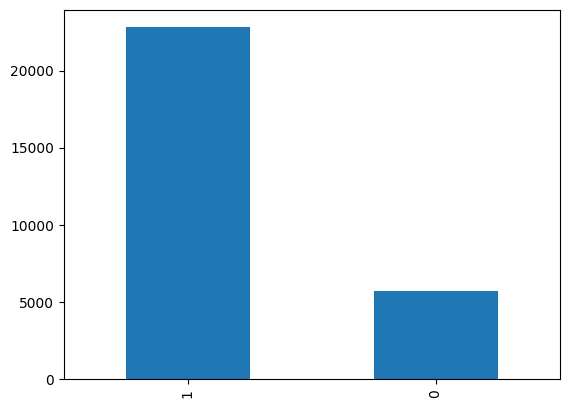

In [89]:
train_df.speaker_gender.value_counts().plot.bar()

In [90]:
#  Note: 
# There is a class imbalance issue in speaker_gender values. As a solution we can use class_weight='balanced' parameter.

# use averaged F1 score 

#Let's choose a good classifer

speaker_gender_pipe_svc = Pipeline([ 
    ('clf', SVC(class_weight='balanced'))
    ])

speaker_gender_pipe_dtc = Pipeline([ 
    ('clf', DecisionTreeClassifier(class_weight='balanced'))
    ])

classes = np.unique(train_speaker_genders)
cw = class_weight.compute_class_weight(class_weight='balanced', classes=classes, y=train_speaker_genders)
weights = dict(zip(classes,cw))
class_weighted_model = DecisionTreeClassifier(class_weight=weights)

speaker_gender_pipe_dtc2 = Pipeline([ 
    ('clf', class_weighted_model)
    ])

speaker_gender_pipe_rfc = Pipeline([ 
    ('clf', RandomForestClassifier(class_weight='balanced'))
])

In [91]:
##visualize Pipeline
from sklearn import set_config
set_config(display='diagram')

### Training

In [92]:
# Pipeine without feature engineering
speaker_gender_pipe_svc.fit(train_X, train_speaker_genders)

Pipeline(steps=[('clf', SVC(class_weight='balanced'))])

In [161]:
# Pipeine with PCA for feature reduction
speaker_gender_pipe_dtc.fit(train_X, train_speaker_genders)

Pipeline(steps=[('clf', DecisionTreeClassifier(class_weight='balanced'))])

In [162]:
# Pipeine with PCA for feature reduction
speaker_gender_pipe_dtc2.fit(train_X, train_speaker_genders)

Pipeline(steps=[('clf',
                 DecisionTreeClassifier(class_weight={0: 2.491264849755416,
                                                      1: 0.6255483418143534}))])

In [163]:
# Pipeine with PCA for feature reduction
speaker_gender_pipe_rfc.fit(train_X, train_speaker_genders)

Pipeline(steps=[('clf', RandomForestClassifier(class_weight='balanced'))])

In [165]:
# now let's check the results
print("With SVC classifier:") 
print(classification_report(valid_speaker_genders, speaker_gender_pipe_svc.predict(valid_X)))
print("With Decision Tree classifier (class_weight='balanced'):") 
print(classification_report(valid_speaker_genders, speaker_gender_pipe_dtc.predict(valid_X)))
print("With Decision Tree classifier (class_weights manuelly calculated):") 
print(classification_report(valid_speaker_genders, speaker_gender_pipe_dtc2.predict(valid_X)))
print("With Random Forest classifier (class_weight='balanced'):") 
print(classification_report(valid_speaker_genders, speaker_gender_pipe_rfc.predict(valid_X)))


With SVC classifier:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       142
           1       1.00      1.00      1.00       608

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750

With Decision Tree classifier (class_weight='balanced'):
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       142
           1       0.96      0.95      0.95       608

    accuracy                           0.93       750
   macro avg       0.87      0.90      0.88       750
weighted avg       0.93      0.93      0.93       750

With Decision Tree classifier (class_weights manuelly calculated):
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       142
           1       0.97      0.95      0.96       608

    accuracy                         

### Prediction on test data

In [93]:
# Pipeline with SVC (class weights balanced) version gave perferct results (1.00 for all metrics in classification report) ==> Therefore let's use that for the prediction of test data

best_speaker_gender_pipe = speaker_gender_pipe_svc
pred_speaker_genders_test = best_speaker_gender_pipe.predict(test_X)
print(pred_speaker_genders_test.shape)

(744,)


In [94]:
pred_speaker_genders_test = pd.DataFrame(pred_speaker_genders_test, columns=['label_3'])
pred_speaker_genders_test.head()

,label_3
0,0
1,1
2,1
3,1
4,0


In [95]:
pred_test.head() # pred_test was already created (when doing prediction of speaker_ID)

,ID,label_1,label_2
0,1,26,22.0
1,2,18,25.0
2,3,16,30.0
3,4,7,27.0
4,5,58,29.0


In [96]:
if "label_3" not in pred_test.columns:
    pred_test.insert(3, "label_3", pred_speaker_genders_test['label_3'])
else:
    print(f"Column : label_3 already exists")

In [97]:
pred_test.head()

,ID,label_1,label_2,label_3
0,1,26,22.0,0
1,2,18,25.0,1
2,3,16,30.0,1
3,4,7,27.0,1
4,5,58,29.0,0


## For speaker_accent

<Axes: >

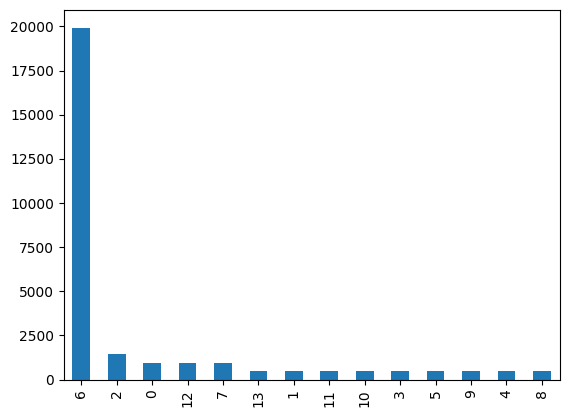

In [74]:
train_df.speaker_accent.value_counts().plot.bar()

In [98]:
# Note: 
# There is a class imbalance issue in speaker_accent values. As a solution we can use class_weight='balanced' parameter.

# use averaged F1 score 

#Let's choose a good classifer

speaker_accent_pipe_svc = Pipeline([ 
    ('clf', SVC(class_weight='balanced'))
    ])

speaker_accent_pipe_dtc = Pipeline([ 
    ('clf', DecisionTreeClassifier(class_weight='balanced'))
    ])

classes = np.unique(train_speaker_accents)
cw = class_weight.compute_class_weight(class_weight='balanced', classes=classes, y=train_speaker_accents)
weights = dict(zip(classes,cw))
class_weighted_model = DecisionTreeClassifier(class_weight=weights)

speaker_accent_pipe_dtc2 = Pipeline([ 
    ('clf', class_weighted_model)
    ])

speaker_accent_pipe_rfc = Pipeline([ 
    ('clf', RandomForestClassifier(class_weight='balanced'))
])

In [99]:
##visualize Pipeline
from sklearn import set_config
set_config(display='diagram')

### Training

In [100]:
speaker_accent_pipe_svc.fit(train_X, train_speaker_accents)

Pipeline(steps=[('clf', SVC(class_weight='balanced'))])

In [176]:
speaker_accent_pipe_dtc.fit(train_X, train_speaker_accents)

Pipeline(steps=[('clf', DecisionTreeClassifier(class_weight='balanced'))])

In [177]:
speaker_accent_pipe_dtc2.fit(train_X, train_speaker_accents)

Pipeline(steps=[('clf',
                 DecisionTreeClassifier(class_weight={0: 2.1331338818249814,
                                                      1: 4.235224235224235,
                                                      2: 1.4058956916099774,
                                                      3: 4.25290784372204,
                                                      4: 4.343588181541273,
                                                      5: 4.261805140466229,
                                                      6: 0.10217388189100497,
                                                      7: 2.1717940907706366,
                                                      8: 4.380952380952381,
                                                      9: 4.315980629539951,
                                                      10: 4.244047619047619,
                                                      11: 4.244047619047619,
                                                      12: 2.135369871218928,
                                                      13: 4.226437462951986}))])

In [178]:
speaker_accent_pipe_rfc.fit(train_X, train_speaker_accents)

Pipeline(steps=[('clf', RandomForestClassifier(class_weight='balanced'))])

In [179]:
# now let's check the results =>Let's consider weighted avg metric when making desicions because it is a good metric when class imbalance is present 
print("With SVC classifier:") 
print(classification_report(valid_speaker_accents, speaker_accent_pipe_svc.predict(valid_X)))
print("With Decision Tree classifier (class_weight='balanced'):") 
print(classification_report(valid_speaker_accents, speaker_accent_pipe_dtc.predict(valid_X)))
print("With Decision Tree classifier (class_weights manuelly calculated):") 
print(classification_report(valid_speaker_accents, speaker_accent_pipe_dtc2.predict(valid_X)))
print("With Random Forest classifier (class_weight='balanced'):") 
print(classification_report(valid_speaker_accents, speaker_accent_pipe_rfc.predict(valid_X)))


With SVC classifier:
              precision    recall  f1-score   support

           0       0.74      0.95      0.83        21
           1       1.00      1.00      1.00        11
           2       0.54      0.96      0.69        27
           3       0.80      1.00      0.89         8
           4       0.60      1.00      0.75        15
           5       0.79      1.00      0.88        11
           6       0.99      0.87      0.93       532
           7       0.76      0.97      0.85        32
           8       0.95      0.95      0.95        19
           9       0.94      1.00      0.97        17
          10       0.77      1.00      0.87        10
          11       0.83      0.91      0.87        11
          12       0.76      0.96      0.85        26
          13       0.91      1.00      0.95        10

    accuracy                           0.90       750
   macro avg       0.81      0.97      0.88       750
weighted avg       0.93      0.90      0.91       750

With

C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [101]:
# Based on above results SVC with class_weight='balanced' performs well.
# Let's now try some feature engineering techniques to check whether it improves weighted avg metric

# Pipleline for speaker accent prediction with PCA for feature reduction
speaker_accent_pipe_scaler_pca_svc = Pipeline([
    # ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('clf', SVC(class_weight='balanced'))
    ])

# Pipleline for speaker accent prediction with Model-based feature reduction
speaker_accent_pipe_scaler_sfmlr_svc = Pipeline([
    # ('scaler', StandardScaler()),
    ('SFM_LR', SelectFromModel(LogisticRegression(C=0.01, penalty='l1', solver='liblinear', class_weight='balanced'))),
    ('clf', SVC(class_weight='balanced'))  
])


In [102]:
speaker_accent_pipe_scaler_pca_svc.fit(train_X, train_speaker_accents)

Pipeline(steps=[('pca', PCA(n_components=0.95)),
                ('clf', SVC(class_weight='balanced'))])

In [103]:
speaker_accent_pipe_scaler_sfmlr_svc.fit(train_X, train_speaker_accents)

Pipeline(steps=[('SFM_LR',
                 SelectFromModel(estimator=LogisticRegression(C=0.01,
                                                              class_weight='balanced',
                                                              penalty='l1',
                                                              solver='liblinear'))),
                ('clf', SVC(class_weight='balanced'))])

In [104]:
# Let's now check the accuracies.
print("Withouth feature engineering: ")
print(speaker_accent_pipe_svc.score(valid_X, valid_speaker_accents))
print("With PCA for feature reduction: ")
print(speaker_accent_pipe_scaler_pca_svc.score(valid_X, valid_speaker_accents))
print("With Model-based feature reduction: ")
print(speaker_accent_pipe_scaler_sfmlr_svc.score(valid_X, valid_speaker_accents))

Withouth feature engineering: 
0.9
With PCA for feature reduction: 
0.948
With Model-based feature reduction: 
0.6733333333333333


In [106]:
num_features_before_reduction = speaker_accent_pipe_svc.named_steps['clf'].n_features_in_
num_features_after_pca = speaker_accent_pipe_scaler_pca_svc.named_steps['pca'].n_components_
num_features_after_sfmlr = sum(speaker_accent_pipe_scaler_sfmlr_svc.named_steps['SFM_LR'].get_support())

print("Number of features before reduction: ", num_features_before_reduction)
print("Number of features after PCA: ", num_features_after_pca)
print("Number of features after model-based feature reduction: ", num_features_after_sfmlr)

Number of features before reduction:  768
Number of features after PCA:  239
Number of features after model-based feature reduction:  55


In [110]:
best_pca__n_components = 0.97
best_clf__C = 10.0
best_clf__kernel = 'rbf'

# Pipleline with best params
best_accent_pipe_scaler_pca_svc = Pipeline([
    # ('scaler', StandardScaler()),
    ('pca', PCA(n_components=best_pca__n_components)),
    ('clf', SVC(C=best_clf__C, kernel=best_clf__kernel))
    ])

best_accent_pipe_scaler_pca_svc.fit(train_X, train_speaker_accents)
print("PCA for feature reduction (Hyperparameters tuned): ", best_accent_pipe_scaler_pca_svc.score(valid_X, valid_speaker_accents))

PCA for feature reduction (Hyperparameters tuned):  0.9906666666666667


In [111]:
classification_report(valid_speaker_accents, best_accent_pipe_scaler_pca_svc.predict(valid_X))

'              precision    recall  f1-score   support\n\n           0       1.00      0.95      0.98        21\n           1       1.00      0.91      0.95        11\n           2       1.00      1.00      1.00        27\n           3       1.00      1.00      1.00         8\n           4       1.00      0.93      0.97        15\n           5       1.00      0.91      0.95        11\n           6       0.99      1.00      0.99       532\n           7       1.00      0.97      0.98        32\n           8       1.00      0.95      0.97        19\n           9       1.00      1.00      1.00        17\n          10       1.00      1.00      1.00        10\n          11       1.00      0.91      0.95        11\n          12       1.00      1.00      1.00        26\n          13       1.00      1.00      1.00        10\n\n    accuracy                           0.99       750\n   macro avg       1.00      0.97      0.98       750\nweighted avg       0.99      0.99      0.99       750\n'

### Hyperparameter tuning

In [ ]:
# Let's now try to improve the accuracy of the model with PCA for feature reduction by tuning the hyperparameters of the model.

# NOTE: When 'cv' parameter is used in the GridSearchCV ==> it does Stratified Croos Validation which is good when class imbalance is there 

# The "balanced accuracy" in binary and multiclass classification problems to deal with imbalanced datasets. It is defined as the average of recall obtained on each class.
param_grid = dict(pca__n_components=[0.95, 0.96, 0.97],
                  clf__C=np.logspace(-2, 1, 4),
                  clf__kernel=['rbf'])

grid = GridSearchCV(speaker_accent_pipe_scaler_pca_svc, param_grid=param_grid, cv=3, n_jobs=1, verbose=2, scoring= 'balanced_accuracy')

### Prediction test data

In [113]:
test_X.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
0,0.187868,-0.009268,0.039846,-0.102515,-0.109121,-0.079769,0.061295,-0.042890,0.099860,-0.066319,...,0.043647,0.061174,0.026771,-0.092734,-0.052383,-0.055526,0.029101,0.041857,-0.027872,0.099500
1,0.122119,0.019015,0.134483,0.007949,-0.157884,-0.033332,0.044334,-0.016869,-0.014088,-0.060542,...,-0.179798,-0.027611,0.240023,-0.005648,-0.057537,0.023922,-0.038126,-0.015171,-0.006270,-0.003790
2,0.079187,0.146195,-0.001316,-0.085596,-0.261093,-0.021620,0.268898,-0.103950,0.068976,-0.062388,...,-0.075460,0.037346,0.124254,-0.369695,-0.056773,-0.028471,0.019971,-0.065683,-0.047366,-0.121744
3,0.231196,0.021558,0.215534,-0.210258,-0.158189,0.041621,0.240254,-0.068112,-0.017550,-0.233767,...,0.083334,0.141642,-0.007219,0.031547,-0.010762,-0.169036,-0.030963,0.086698,0.114194,-0.036775
4,0.020412,0.063732,-0.065506,-0.089598,-0.130788,-0.018809,0.119304,-0.057494,0.094714,-0.047923,...,-0.001969,-0.003025,-0.021156,-0.136993,-0.003615,0.036371,0.048715,-0.002688,-0.016957,-0.004331


In [114]:
pred_speaker_accents_test = best_accent_pipe_scaler_pca_svc.predict(test_X)
print(pred_speaker_accents_test.shape)

(744,)


In [115]:
pred_speaker_accents_test = pd.DataFrame(pred_speaker_accents_test, columns=['label_4'])
pred_speaker_accents_test.head()

,label_4
0,2
1,8
2,6
3,6
4,6


In [116]:
pred_test.head() # pred_test was already created (when doing prediction of speaker_ID)


,ID,label_1,label_2,label_3
0,1,26,22.0,0
1,2,18,25.0,1
2,3,16,30.0,1
3,4,7,27.0,1
4,5,58,29.0,0


In [117]:
if "label_4" not in pred_test.columns:
    pred_test.insert(4, "label_4", pred_speaker_accents_test['label_4'])
else:
    print(f"Column : label_4 already exists")

In [119]:
pred_test_layer7 = pred_test
pred_test_layer7.head() 

,ID,label_1,label_2,label_3,label_4
0,1,26,22.0,0,2
1,2,18,25.0,1,8
2,3,16,30.0,1,6
3,4,7,27.0,1,6
4,5,58,29.0,0,6


In [200]:
pred_test_layer7.to_csv('190290U_pred_test_layer7.csv', index=False)

In [ ]:
# #################### RUN BELOW FOR THE BEST MODEL ####################

# # After grid search is complete, save the best estimator
# best_svm = grid_search.best_estimator_

# # You can also save the best hyperparameters
# best_params = grid_search.best_params_

# # Now, you can use the best estimator for making predictions or further operations
# y_pred = best_svm.predict(X_validation)  # Example: Using it for predictions on validation data

# # If you want to create a new instance of the model with the best hyperparameters
# svm_with_best_params = SVC(**best_params)
# svm_with_best_params.fit(X_train, y_train)  # Train the new model


In [52]:
# all other labels (age, gender, accent) have class imbalance problem. So account for that -> I think cv parameter in grid search cv can be used for that
# read about it ==> https://scikit-learn.org/stable/modules/cross_validation.html (Cross validation)
# This is vital because, we cannot track the model performance using a single metric
# if cv is given an integer value, it will use stratified k fold cross validation




In [ ]:
# TSNE : feature rection technique

# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import uniform

# # Define a range of hyperparameters and their distributions for random search
# param_dist = {
#     'clf__C': uniform(loc=0.1, scale=10),  # Regularization parameter (uniform distribution)
#     'clf__kernel': ['linear', 'rbf', 'poly'],  # Kernel type
# }

# # Create a random search object
# random_search = RandomizedSearchCV(estimator=speaker_ID_pipe_scaler_svc, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# # Fit the random search to the data
# random_search.fit(X_train, y_train)

# # Get the best hyperparameters
# best_params_random = random_search.best_params_
# best_accuracy_random = random_search.best_score_

# print("Best Hyperparameters (Random Search):", best_params_random)
# print("Best Accuracy (Random Search):", best_accuracy_random)


In [ ]:
# code to compare different pipelines

# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
# from sklearn.svm import SVC
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import accuracy_score

# # Load a sample dataset (Iris dataset in this example)
# data = load_iris()
# X, y = data.data, data.target

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a common feature scaling pipeline
# common_preprocessing = Pipeline([
#     ('scaler', StandardScaler())
# ])

# # Define pipelines with different feature reduction techniques on top of common preprocessing
# # You can add more as needed
# pca_pipeline = Pipeline([
#     ('preprocessing', common_preprocessing),
#     ('pca', PCA(n_components=2)),  # Adjust the number of components as needed
#     ('clf', SVC()),
# ])

# tsne_pipeline = Pipeline([
#     ('preprocessing', common_preprocessing),
#     ('tsne', TSNE(n_components=2)),  # Adjust the number of components as needed
#     ('clf', SVC()),
# ])

# selectkbest_pipe = Pipeline([
#     ('preprocessing', common_preprocessing),
#     ('SelectKBest', SelectKBest(chi2, k=10)),
#     ('clf', SVC())
# ])

# # Create a list of feature reduction pipelines for easy iteration
# feature_reduction_pipelines = [
#     ("PCA", pca_pipeline),
#     ("t-SNE", tsne_pipeline),
# ]

# # Fit and compare the performance of different feature reduction pipelines
# for name, pipeline in feature_reduction_pipelines:
#     # Fit the pipeline on the training data
#     pipeline.fit(X_train, y_train)
    
#     # Make predictions on the testing data
#     y_pred = pipeline.predict(X_test)
    
#     # Calculate and print the accuracy
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f"Accuracy with {name}: {accuracy:.2f}")

########################################################################################
###########So we effectively fit the scaler pipeline 2 times right? is it the case?################################
########################################################################################
########################################################################################

# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
# from sklearn.svm import SVC
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import accuracy_score

# # Load a sample dataset (Iris dataset in this example)
# data = load_iris()
# X, y = data.data, data.target

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create a common feature scaling pipeline and fit it once
# common_preprocessing = Pipeline([
#     ('scaler', StandardScaler())
# ])

# # Fit the common preprocessing pipeline on the training data
# common_preprocessing.fit(X_train)

# # Define pipelines with different feature reduction techniques using the fitted common preprocessing
# # You can add more as needed
# pca_pipeline = Pipeline([
#     ('preprocessing', common_preprocessing),
#     ('pca', PCA(n_components=2)),  # Adjust the number of components as needed
#     ('clf', SVC()),
# ])

# tsne_pipeline = Pipeline([
#     ('preprocessing', common_preprocessing),
#     ('tsne', TSNE(n_components=2)),  # Adjust the number of components as needed
#     ('clf', SVC()),
# ])

# # Create a list of feature reduction pipelines for easy iteration
# feature_reduction_pipelines = [
#     ("PCA", pca_pipeline),
#     ("t-SNE", tsne_pipeline),
# ]

# # Fit and compare the performance of different feature reduction pipelines
# for name, pipeline in feature_reduction_pipelines:
#     # Make predictions on the testing data using the fitted common preprocessing
#     X_test_preprocessed = pipeline.named_steps['preprocessing'].transform(X_test)
#     y_pred = pipeline.named_steps['clf'].predict(X_test_preprocessed)
    
#     # Calculate and print the accuracy
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f"Accuracy with {name}: {accuracy:.2f}")

